In [2]:
from riskeye.utils.data import Subject, get_all_behavior

In [3]:
df = get_all_behavior()
df['risky_left'] = df['p_right'] == 1.0

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df

accuracy     rt  leftRight  \
subject run exptype      block trial_nr                               
1       1   symbolic     1     1                1  1.215          1   
                               2                1  0.737         -1   
                               3                1  0.920         -1   
                               4                1  0.965         -1   
                               5                1  1.218          1   
...                                           ...    ...        ...   
64      5   non-symbolic 2     236              1  0.674          1   
                               237              0  0.915          1   
                               238              1  0.669          1   
                               239              1  0.822         -1   
                               240              1  1.015          1   

                                         pressedKey  n_safe  n_risky  \
subject run exptype      block trial_nr                                
1       1   symbolic     1     1                 75      14       47   
                               2                 77       5        6   
                               3                 77      14       17   
                               4                 77      10       12   
                               5                 75      14       28   
...                                             ...     ...      ...   
64      5   non-symbolic 2     236               75      14       15   
                               237               75       5       12   
                               238               75      10       12   
                               239               77       5       20   
                               240               75      20       22   

                                         constSide  correct_perm  reset  \
subject run exptype      block trial_nr                                   
1       1   symbolic     1     1                 0            -1     -1   
                               2                 0             1     -1   
                               3                 0             1     -1   
                               4                 0             1     -1   
                               5                 0            -1     -1   
...                                            ...           ...    ...   
64      5   non-symbolic 2     236               0             1      1   
                               237               0            -1      1   
                               238               0             1      1   
                               239               0            -1      1   
                               240               0             1      1   

                                           onset  n_left  n_right  p_left  \
subject run exptype      block trial_nr                                     
1       1   symbolic     1     1           6.065      14       47    1.00   
                               2          11.708       5        6    1.00   
                               3          17.284      14       17    1.00   
                               4          22.882      10       12    1.00   
                               5          28.471      14       28    1.00   
...                                          ...     ...      ...     ...   
64      5   non-symbolic 2     236       248.035      15       14    0.55   
                               237       253.570      12        5    0.55   
                               238       259.087      12       10    0.55   
                               239       264.623      20        5    0.55   
                               240       270.161      22       20    0.55   

                                         p_right  chose_risky  \
subject run exptype      block trial_nr                         
1       1   symbolic     1     1            0.55          1.0   
       

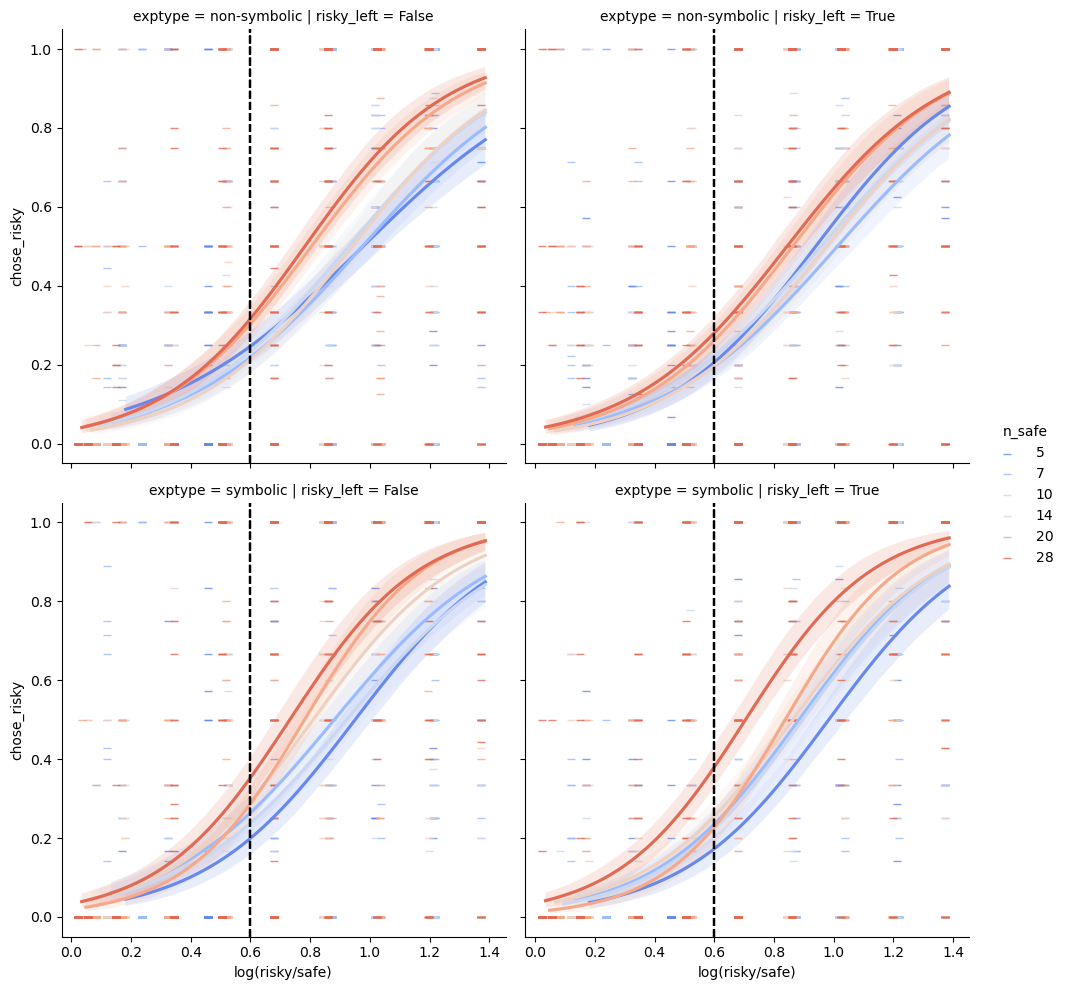

In [6]:
g = sns.lmplot(x='log(risky/safe)', y='chose_risky',
           data=df.groupby(['subject', 'exptype', 'log(risky/safe)', 'n_safe', 'risky_left']).mean().reset_index(),
           col='risky_left', hue='n_safe', logistic=True, markers=False, palette=sns.color_palette('coolwarm', 6),
           row='exptype')
g.map(lambda *args, **kwargs: plt.axvline(np.log(1./.55), c='k', ls='--'))

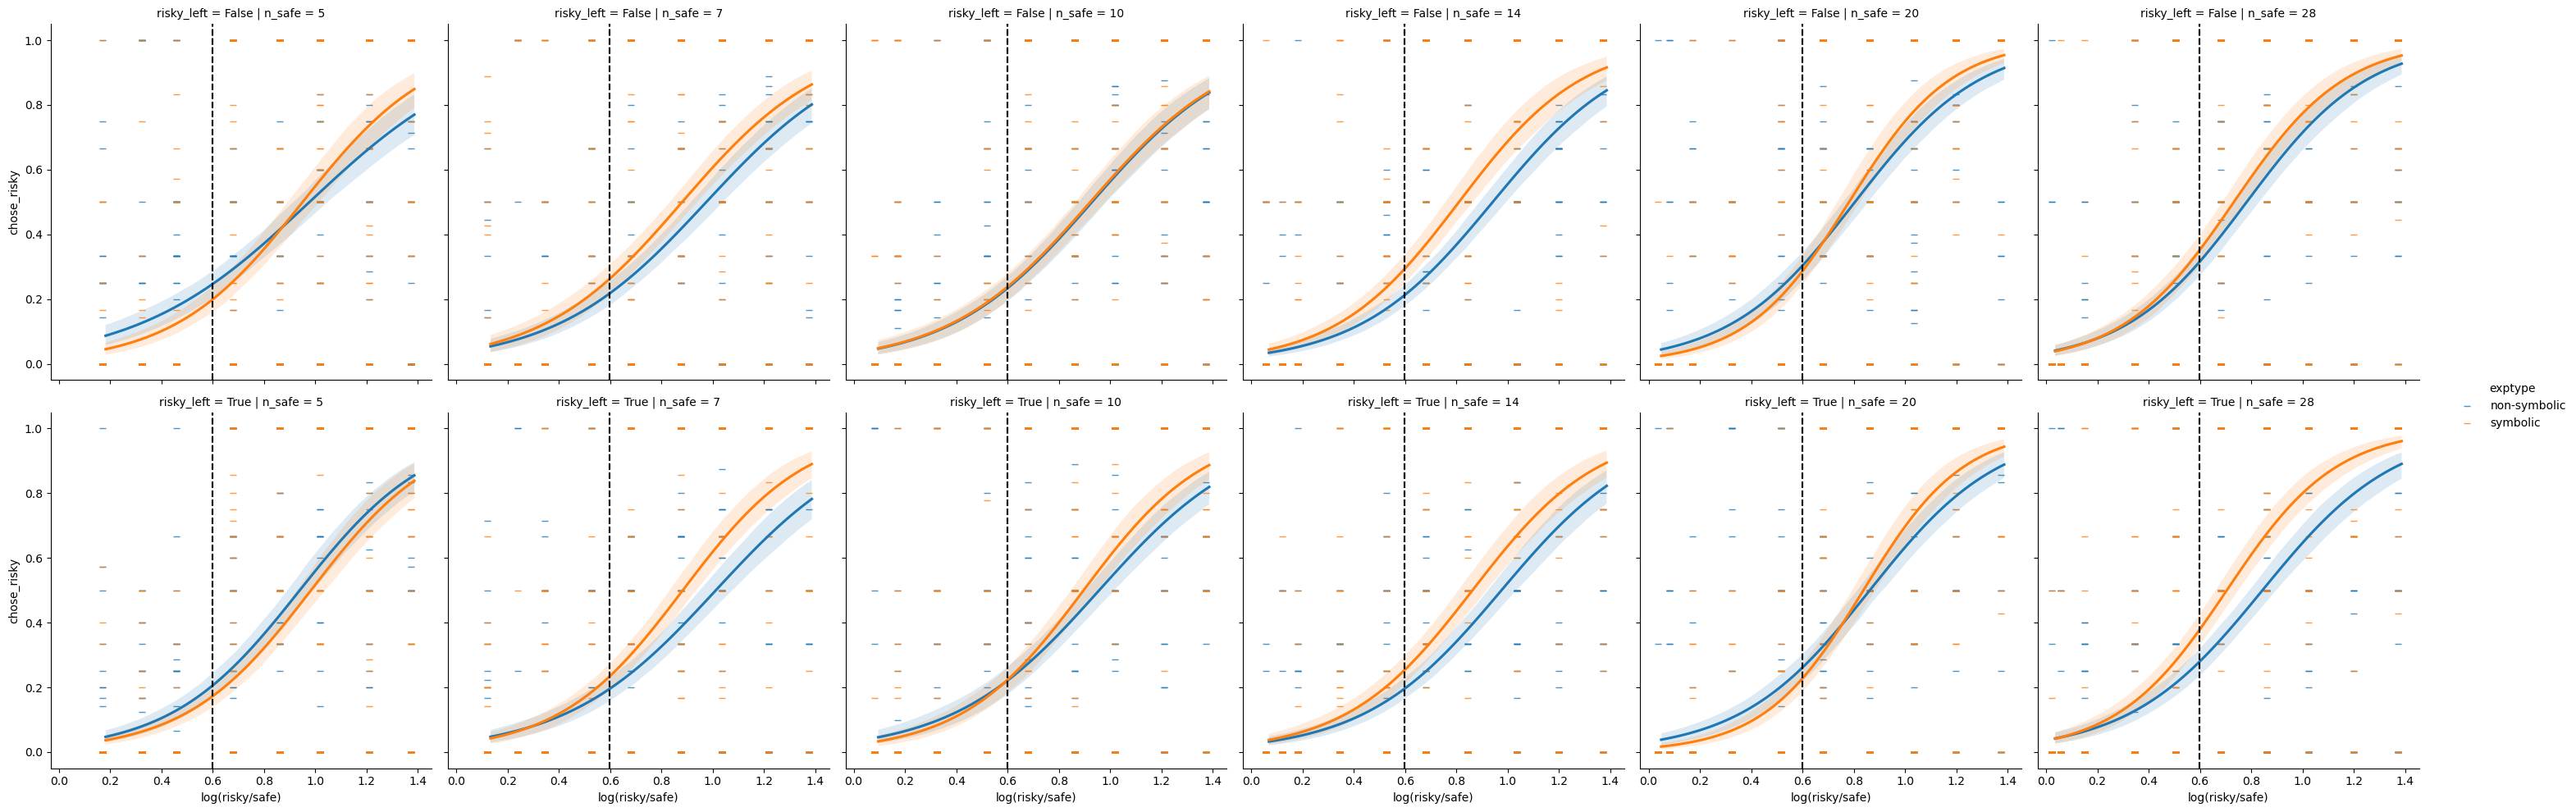

In [36]:
g = sns.lmplot(x='log(risky/safe)', y='chose_risky',
           data=df.groupby(['subject', 'exptype', 'log(risky/safe)', 'n_safe', 'risky_left']).mean().reset_index(),
           row='risky_left', col='n_safe', logistic=True, markers=False,
           hue='exptype')
g.map(lambda *args, **kwargs: plt.axvline(np.log(1./.55), c='k', ls='--'))

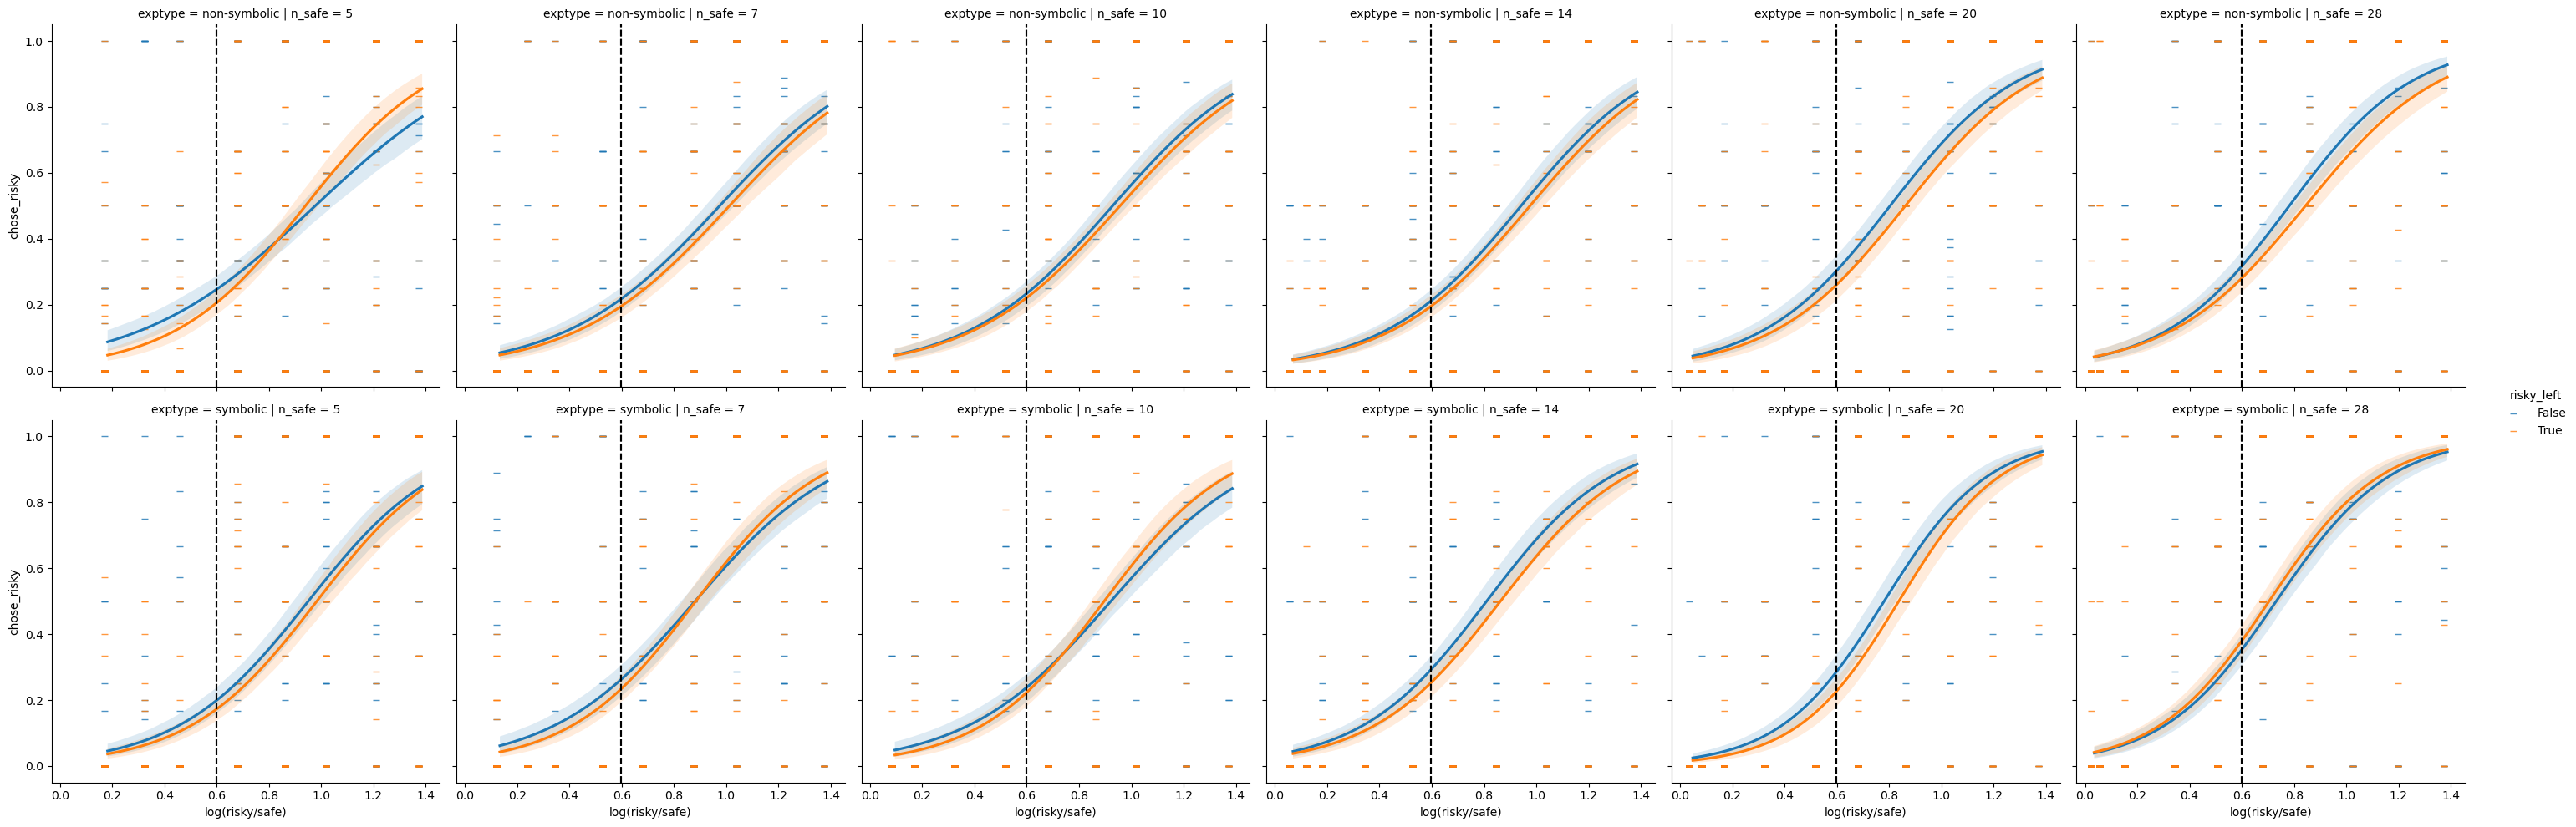

In [8]:
g = sns.lmplot(x='log(risky/safe)', y='chose_risky',
           data=df.groupby(['subject', 'exptype', 'log(risky/safe)', 'n_safe', 'risky_left']).mean().reset_index(),
           hue='risky_left', col='n_safe', logistic=True, markers=False,
           row='exptype')
g.map(lambda *args, **kwargs: plt.axvline(np.log(1./.55), c='k', ls='--'))

In [24]:
import pandas as pd
# df['risky_left'].where(df['risky_left'] == True, 0)
df['n1'], df['n2'] = df['n_left'], df['n_right']
df['p1'], df['p2'] = df['p_left'], df['p_right']
df['choice'] = df['leftRight'] == 1